In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime


from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob


In [2]:
!ls /Data2/SubX/EMC/GEFS/

cape					   sty_sfc
climatology				   swe_sfc
correctedfiles.d			   ta_10
cprat_sfc				   ta_100
DJF					   ta_30
dlwrf_sfc				   ta_50
dswrf_sfc				   tas_2m
forecast				   tasmax_sfc
grb2_databefore1strecord.txt		   tasmin_sfc
grb2_large_int_byte_files.txt		   tdps_sfc
hfls_sfc				   ts_sfc
hfss_sfc				   ua_10
hlcy					   ua_100
huss_850				   ua_10m
JJA					   ua_200
originaltarfiles.d			   ua_30
pentad_climatology			   ua_50
prate_sfc				   ua_850
pr_sfc					   ulwrf_sfc
psl_sfc					   uswrf_sfc
rlut_toa				   va_10
RMM					   va_100
ROMI					   va_10m
sic_sfc					   va_200
snc_sfc					   va_30
snod_sfc				   va_50
soilw1_sfc				   va_850
soilw2_sfc				   wap_500
soilw3_sfc				   zg_10
soilw4_sfc				   zg_200
SON					   zg_30
sorted_grb2_EMC_GEFS_prob_files_final.txt  zg_50
sorted_grb2_prob_files.txt		   zg_500
sort_grb2_large_int_byte_files.txt	   zg_850
stx_sfc


In [3]:
!ls /Data2/SubX/EMC/GEFS/tdps_sfc/


1999  2001  2003  2005	2007  2009  2011  2013	2015
2000  2002  2004  2006	2008  2010  2012  2014	2016


In [4]:
!ls /Data2/SubX/EMC/GEFS/tdps_sfc/1999

01  02	03  04	05  06	07  08	09  10	11  12


In [5]:
#!ls /Data2/SubX/EMC/GEFS/tdps_sfc/1999/01

# This is my preprocessing function, which I run on each grib file

In [6]:
# def ppf2_filename(ds,filename):
#     # rename coordinates
#     ds  = ds.rename({ 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'L'})
#     # getting start time from file name
#     ts = filename.split('_')
#     whereGEFS = ts.index('GEFS')
#     dateSstr = ts[whereGEFS+1]
#     dateS = datetime.strptime(dateSstr, '%d%b%Y')
#     ds.coords['S'] = 'S', np.atleast_1d(dateS)
    
#     # replacing L dates with integer (lead days)
#     # so that I can reduce to a fixed size
#     # BEWARE - this is a hardcoded step now, so it needs to be checked for each model
    
#     #if you comment in the two print lines, you will see how L is read by xarray from the grib file
# #     print(ds.L)
# #     print(ds.S)
#     ds.coords['L']=np.arange(0.5,35.5)

#     # select US
#     ds = ds.sel(lat=slice(42,32),lon=slice(-103+360,-90+360))
# #     print(ds)
#     return ds

L in this files is read by xarray like this

`<xarray.DataArray 'L' (L: 35)>
array([  3600000000000,   7200000000000,  10800000000000,  14400000000000,
        18000000000000,  21600000000000,  25200000000000,  28800000000000,
        32400000000000,  36000000000000,  39600000000000,  43200000000000,
        46800000000000,  50400000000000,  54000000000000,  57600000000000,
        61200000000000,  64800000000000,  68400000000000,  72000000000000,
        75600000000000,  79200000000000,  82800000000000,  86400000000000,
        90000000000000,  93600000000000,  97200000000000, 100800000000000,
       104400000000000, 108000000000000, 111600000000000, 115200000000000,
       118800000000000, 122400000000000, 126000000000000],
      dtype='timedelta64[ns]')`

however if I use wgrib2 on one file
`!wgrib2 -v /Data2/SubX/EMC/GEFS/cape/1999/06/cape_GEFS_02jun1999_00z_d01_d35_m00.grb2 `

I get something like

` 1:0:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:1 day fcst:ENS=low-res ctl
2:46954:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:2 day fcst:ENS=low-res ctl
3:92924:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:3 day fcst:ENS=low-res ctl
4:139690:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:4 day fcst:ENS=low-res ctl
5:186582:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:5 day fcst:ENS=low-res ctl `

Let's make sure I am correctly overwriting L.

I am now using L=array([  43200000000000,  129600000000000,  216000000000000,
        302400000000000,  388800000000000,  475200000000000,
        561600000000000,  648000000000000,  734400000000000,
        820800000000000,  907200000000000,  993600000000000,
       1080000000000000, 1166400000000000, 1252800000000000,
       1339200000000000, 1425600000000000, 1512000000000000,
       1598400000000000, 1684800000000000, 1771200000000000,
       1857600000000000, 1944000000000000, 2030400000000000,
       2116800000000000, 2203200000000000, 2289600000000000,
       2376000000000000, 2462400000000000, 2548800000000000,
       2635200000000000, 2721600000000000, 2808000000000000,
       2894400000000000, 2980800000000000, 3067200000000000,
       3153600000000000, 3240000000000000, 3326400000000000,
       3412800000000000, 3499200000000000, 3585600000000000,
       3672000000000000, 3758400000000000, 3844800000000000], etc......
      dtype='timedelta64[ns]')
      
from the other models I loaded 

# Load, preprocess, append, and concatenate all the grib files. In this notebook I ran it on half of the data available.

### I will comment the code below for pr_sfc. I repeat the code for each variable separiately. I could loop it for a list of varname =[ 'pr_sfc' , ....] but I preferred keeping it separate.

In [7]:
# def ppf2_filename(ds,filename):
#     # rename coordinates
#     ds  = ds.rename({ 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'time'})
#     # getting start time from file name
#     ts = filename.split('_')
#     print(ts)
#     whereGEFS = ts.index('GEFS')
#     dateSstr = ts[whereGEFS+1]
#     dateS = datetime.strptime(dateSstr, '%d%b%Y')
    
#     Mvalue = np.int(float(np.asarray(ts[-1][2:4])))

#     ds.coords['S'] = 'S', np.atleast_1d(dateS)
#     ds.coords['M'] = 'M', np.atleast_1d(Mvalue)
    
#     # replacing L dates with integer (lead days)
#     # so that I can reduce to a fixed size
#     # BEWARE - this is a hardcoded step now, so it needs to be checked for each model
    
#     #if you comment in the two print lines, you will see how L is read by xarray from the grib file
# #     print(ds.L)
# #     print(ds.S)
#     ds.coords['time']=np.array([  43200000000000,  129600000000000,  216000000000000,
#         302400000000000,  388800000000000,  475200000000000,
#         561600000000000,  648000000000000,  734400000000000,
#         820800000000000,  907200000000000,  993600000000000,
#        1080000000000000, 1166400000000000, 1252800000000000,
#        1339200000000000, 1425600000000000, 1512000000000000,
#        1598400000000000, 1684800000000000, 1771200000000000,
#        1857600000000000, 1944000000000000, 2030400000000000,
#        2116800000000000, 2203200000000000, 2289600000000000,
#        2376000000000000, 2462400000000000, 2548800000000000,
#        2635200000000000, 2721600000000000, 2808000000000000,
#        2894400000000000, 2980800000000000],
#       dtype='timedelta64[ns]')

#     # select US
#     ds = ds.sel(lat=slice(23,50), lon=slice(230,300))
# #     print(ds)
#     return ds

In [8]:
# ds = xr.open_dataset('/Data2/SubX/EMC/GEFS/cape/1999/01/cape_GEFS_06jan1999_00z_d01_d35_m00.grb2',
#                 engine='pynio')
# ds = ppf2_filename(ds,'/Data2/SubX/EMC/GEFS/cape/1999/01/cape_GEFS_06jan1999_00z_d01_d35_m00.grb2')
# ds

In [9]:
#!ls /Data2/SubX/EMC/GEFS/cape/1999/11

In [10]:
from glob import glob
variable_names = ['pr_sfc']

def ppf2_filename(ds,filename):
    # rename coordinates
    ds  = ds.rename({ 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'time'})
    # getting start time from file name
    ts = filename.split('_')
#     print(ts)
    whereGEFS = ts.index('GEFS')
#     print(whereGEFS)
    dateSstr = ts[whereGEFS+1]
#     print(dateSstr)
    dateS = datetime.strptime(dateSstr, '%d%b%Y')
#     print(dateS)
    
    Mvalue = np.int(float(np.asarray(ts[-1][2:4])))

    ds.coords['S'] = 'S', np.atleast_1d(dateS)
    ds.coords['M'] = 'M', np.atleast_1d(Mvalue)
    
    ds.coords['time']=np.array([  43200000000000,  129600000000000,  216000000000000,
        302400000000000,  388800000000000,  475200000000000,
        561600000000000,  648000000000000,  734400000000000,
        820800000000000,  907200000000000,  993600000000000,
       1080000000000000, 1166400000000000, 1252800000000000,
       1339200000000000, 1425600000000000, 1512000000000000,
       1598400000000000, 1684800000000000, 1771200000000000,
       1857600000000000, 1944000000000000, 2030400000000000,
       2116800000000000, 2203200000000000, 2289600000000000,
       2376000000000000, 2462400000000000, 2548800000000000,
       2635200000000000, 2721600000000000, 2808000000000000,
       2894400000000000, 2980800000000000],
      dtype='timedelta64[ns]')

    # select US
    ds = ds.sel(lat=slice(50,23), lon=slice(230,300))
#     print(ds)
    return ds

def read_netcdfs(files, dim, transform_func=None):
    def process_one_path(path):
        # use a context manager, to ensure the file gets closed after use
#         print(path)
        with xr.open_dataset(path, engine='pynio', chunks={}) as ds:
            # transform_func should do some sort of selection or
            # aggregation
            if transform_func is not None:
                ds = transform_func(ds, path)
            # load all data from the transformed dataset, to ensure we can
            # use it after closing each original file
#             print(ds)
#             ds.load()
            return ds
#     print(files)
    paths = sorted(glob(files))
#     print(paths)
    datasets = [process_one_path(p) for p in paths]
    
    combined = xr.combine_by_coords(datasets)
    combined = combined.chunk({'S':4,'M':-1})
    return combined

var_l=[]
for ivx, ivar in enumerate(variable_names):
    print(ivar)
    if ivar in os.listdir('/Data2/SubX/EMC/GEFS/'):
        c_l = []
        for iy in np.arange(1999, 2017):#2017
            print(iy)
            # here we suppose we only care about the combined mean of each file;
            # you might also use indexing operations like .sel to subset datasets
            combined = read_netcdfs('/Data2/SubX/EMC/GEFS/'+ivar+'/'+np.str(iy)+'/*/*.grb2', dim=['S','M'],
                                    transform_func=ppf2_filename)
            
            c_l.append(combined)
    all_values = xr.concat(c_l, dim='S') 
    var_l.append(all_values)


pr_sfc
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [11]:
all_variables = xr.merge(var_l)
all_variables

<xarray.Dataset>
Dimensions:          (M: 10, S: 939, lat: 28, lon: 71, time: 35)
Coordinates:
  * time             (time) timedelta64[ns] 0 days 12:00:00 ... 34 days 12:00:00
  * lat              (lat) float32 50.0 49.0 48.0 47.0 ... 26.0 25.0 24.0 23.0
  * lon              (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * M                (M) int64 0 1 2 3 4 5 6 7 8 9
  * S                (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-28
Data variables:
    APCP_P1_L1_GLL0  (S, M, time, lat, lon) float32 dask.array<chunksize=(4, 10, 35, 28, 71), meta=np.ndarray>

In [12]:
all_variables = all_variables.rename({'APCP_P1_L1_GLL0':'pr_sfc'})

In [13]:
all_variables

<xarray.Dataset>
Dimensions:  (M: 10, S: 939, lat: 28, lon: 71, time: 35)
Coordinates:
  * time     (time) timedelta64[ns] 0 days 12:00:00 ... 34 days 12:00:00
  * lat      (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 27.0 26.0 25.0 24.0 23.0
  * lon      (lon) float32 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * M        (M) int64 0 1 2 3 4 5 6 7 8 9
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
Data variables:
    pr_sfc   (S, M, time, lat, lon) float32 dask.array<chunksize=(4, 10, 35, 28, 71), meta=np.ndarray>

In [14]:
all_variables.load()

<xarray.Dataset>
Dimensions:  (M: 10, S: 939, lat: 28, lon: 71, time: 35)
Coordinates:
  * time     (time) timedelta64[ns] 0 days 12:00:00 ... 34 days 12:00:00
  * lat      (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 27.0 26.0 25.0 24.0 23.0
  * lon      (lon) float32 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * M        (M) int64 0 1 2 3 4 5 6 7 8 9
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
Data variables:
    pr_sfc   (S, M, time, lat, lon) float32 1.1 1.2 1.0 ... 0.84 0.65999997 0.39

In [15]:
all_variables.coords['target_time'] = all_variables.S+all_variables.time


# Does climatology depend on lead times?

# calculate climatology for a handful of Target dates (3 day accumulated rain) by pooling 5 S dates and a range of L 1-5, 7-11, 13-17

In [16]:
# Generate target time to check on L dependnece 
target = [ '1900-'+np.str(month).zfill(2)+'-'+np.str(15).zfill(2) for month in np.arange(1,13)]
# transform them in correct dtype
target = [np.datetime64(it) for it in target ]
target = [pd.DatetimeIndex([it]) for it in target ]

In [17]:
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES'  

i_v_u ='EMC/.GEFS'
#                'GMAO/.GEOS_V2p1',
#                'NRL/.NESM',
#                'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              #]

ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3+MASK_url2)
ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)

ds_mask = ds_mask.rename({'X':'lon', 'Y':'lat'})
ds_mask = ds_mask.isel(objectid=0, drop=True)
ds_mask.coords['lon'] = ds_mask.lon+360.



# re do this with accumulated 3 day rainfall. The accumulation (rolling sum) is done along L

In [18]:
all_variables_3L = all_variables.rolling(time=3).sum()


# The rolling sum assign the right edge value of the interval

In [19]:
all_variables_3L.pr_sfc[0,0,:,10,20]

<xarray.DataArray 'pr_sfc' (time: 35)>
array([           nan,            nan,  1.0000000e-01,  1.0000000e-01,
        1.0000000e-01,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  3.4000001e+00,  6.6999998e+00,  7.2999997e+00,
        1.2400000e+01,  9.0999994e+00,  8.4999990e+00, -9.5367432e-07,
        3.9999990e+00,  3.9999990e+00,  3.9999990e+00, -9.5367432e-07,
       -9.5367432e-07,  9.9999048e-02,  2.9999906e-01,  2.9999906e-01,
        1.9999906e-01, -9.3877316e-07,  1.9999906e-01,  1.9999906e-01,
        1.9999906e-01, -9.3877316e-07,  9.9999063e-02,  9.9999063e-02,
        9.9999063e-02,  9.9999905e-01,  9.9999905e-01], dtype=float32)
Coordinates:
  * time         (time) timedelta64[ns] 0 days 12:00:00 ... 34 days 12:00:00
    lat          float32 40.0
    lon          float32 250.0
    M            int64 0
    S            datetime64[ns] 1999-01-06
    target_time  (time) datetime64[ns] 1999-01-06T12:00:00 ... 1999-02-09T12:00:00

# Here I switch to the left edge of the interval

In [20]:
all_variables_3L.coords['time'] = all_variables_3L.time.values-np.timedelta64(2,'D')

# And drop the first 2 empty values

In [21]:
all_variables_3L = all_variables_3L.isel(time=slice(2,36))
all_variables_3L.pr_sfc[0,0,:,10,20]

<xarray.DataArray 'pr_sfc' (time: 33)>
array([ 1.0000000e-01,  1.0000000e-01,  1.0000000e-01,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  3.4000001e+00,
        6.6999998e+00,  7.2999997e+00,  1.2400000e+01,  9.0999994e+00,
        8.4999990e+00, -9.5367432e-07,  3.9999990e+00,  3.9999990e+00,
        3.9999990e+00, -9.5367432e-07, -9.5367432e-07,  9.9999048e-02,
        2.9999906e-01,  2.9999906e-01,  1.9999906e-01, -9.3877316e-07,
        1.9999906e-01,  1.9999906e-01,  1.9999906e-01, -9.3877316e-07,
        9.9999063e-02,  9.9999063e-02,  9.9999063e-02,  9.9999905e-01,
        9.9999905e-01], dtype=float32)
Coordinates:
  * time         (time) timedelta64[ns] 0 days 12:00:00 ... 32 days 12:00:00
    lat          float32 40.0
    lon          float32 250.0
    M            int64 0
    S            datetime64[ns] 1999-01-06
    target_time  (time) datetime64[ns] 1999-01-08T12:00:00 ... 1999-02-09T12:00:00

# Update the target time, because those have not changed and they are still linked to the right edge of the interval

In [22]:
all_variables_3L.coords['target_time'] = all_variables_3L.S+all_variables_3L.time
all_variables_3L

<xarray.Dataset>
Dimensions:      (M: 10, S: 939, lat: 28, lon: 71, time: 33)
Coordinates:
  * time         (time) timedelta64[ns] 0 days 12:00:00 ... 32 days 12:00:00
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * M            (M) int64 0 1 2 3 4 5 6 7 8 9
  * S            (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-28
    target_time  (S, time) datetime64[ns] 1999-01-06T12:00:00 ... 2017-01-29T12:00:00
Data variables:
    pr_sfc       (S, M, time, lat, lon) float32 10.5 3.5 ... 1.3400015 1.0199976

In [23]:
all_variables_T3 = all_variables_3L.stack(St=('S','time'))
all_variables_T3 = all_variables_T3.swap_dims({'St':'target_time'})
all_variables_T3 = all_variables_T3.unstack()


In [24]:
# looping through the target dates for climatologies
ds_clim_test_3d = []
for iT in target:
    # extract values that correspond to the target dates
    temp = all_variables_T3.where((all_variables_T3.target_time.dt.month==iT.month.values[0])&
                              (all_variables_T3.target_time.dt.day==iT.day.values[0]), drop=True)
    
    # bits to extract the S and t of each target_time
    y_ls = [y for (x,y) in temp.St.values]
    y_arr = np.array(y_ls)
    # loop through the 3 types of lead times
    # I have the -1 because of the way the timedelta is centered at 0 day and 12hours for day 1
#     for different_lead1, different_lead2 in zip(np.array([1,7,13])-1, np.array([5,11,17])-1 ):
    for different_lead1, different_lead2 in zip(np.array([2,4,6,8])-1, np.array([10,12,14,16])-1 ):
#         print(y_arr[(y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D'))])
        temp2 = temp.sel(target_time=
                         (y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D')))
        temp3 = temp2.stack(Mtt=('M','target_time'))
#         print(temp3.pr_sfc.values.shape)
        temp3 = temp3.quantile(dim=['Mtt'], q=[0.15,0.33,0.5,0.667,0.85])
        temp3 = temp3.expand_dims('Lbeg')
        temp3.coords['Lbeg'] = 'Lbeg', np.atleast_1d(different_lead1+1)
#         print(temp3)
        if different_lead1==1:
            ds_quantile = temp3*1.
        else:
            ds_quantile = xr.merge([ds_quantile,temp3])
    ds_quantile = ds_quantile.expand_dims('target_clim')
    ds_quantile.coords['target_clim'] = 'target_clim', np.atleast_1d(iT)
    ds_clim_test_3d.append(ds_quantile)
ds_clim_test_3d = xr.combine_by_coords(ds_clim_test_3d)    


In [25]:
ds_clim_test_3d = ds_clim_test_3d.rename({'quantile':'quant'})


In [26]:
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# # globe = ccrs.Globe(semimajor_axis=proj_var.earth_radius)
# # proj = ccrs.Stereographic(central_latitude=90.0,
# #                           central_longitude=230,
# #                           true_scale_latitude=50)
# map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

# for iT in ds_clim_test_3d.target_clim:
#     temp = ds_clim_test_3d.sel(target_clim=iT.values)
#     for iq in temp.quant:
#         temp1 = temp.sel(quant=iq.values)
#         temp1 = xr.where(temp1<0,0,temp1)
# #         print(temp1)
#         outp = temp1.pr_sfc.plot(transform=ccrs.PlateCarree(),
#                           col='Lbeg', col_wrap=3,
#                                  figsize=(20,3),
#                          subplot_kws={'projection': map_proj},
#                          cmap='twilight')
#         plt.suptitle(['q='+np.str(iq.values)+' time='+np.str(iT.dt.month.values)+'-'+np.str(iT.dt.day.values)])
#         for axi in outp.axes[:][0]:
#             axi.coastlines()
#             axi.add_feature(cfeature.BORDERS)
#             axi.add_feature(cfeature.STATES)


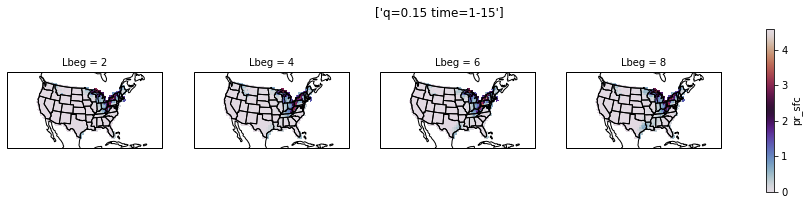

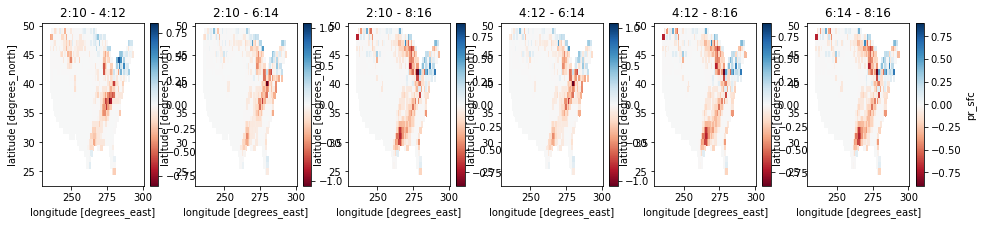

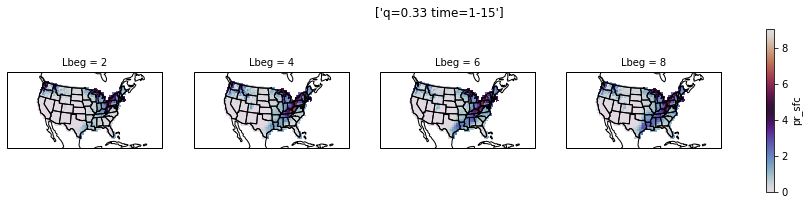

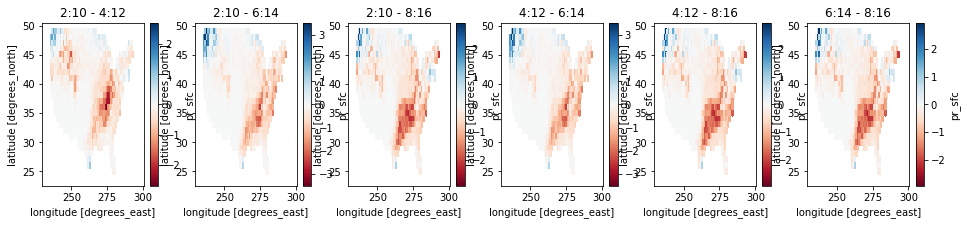

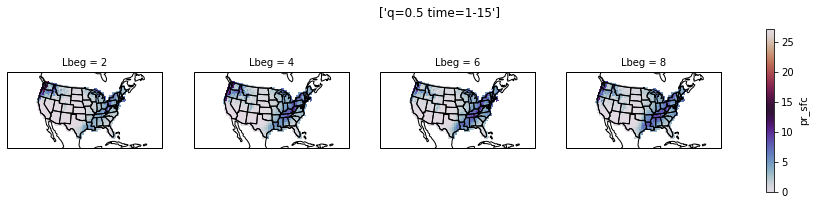

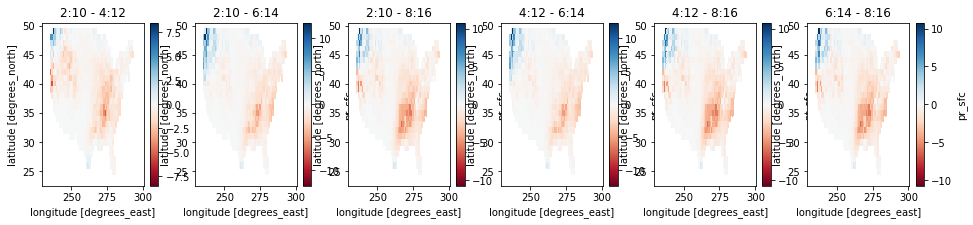

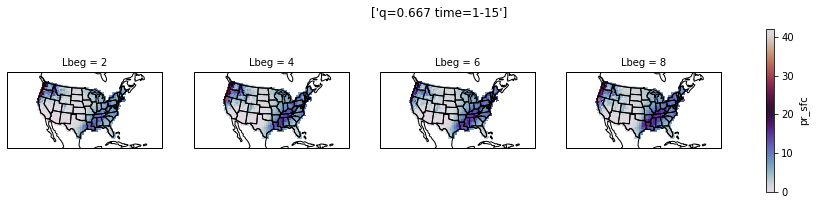

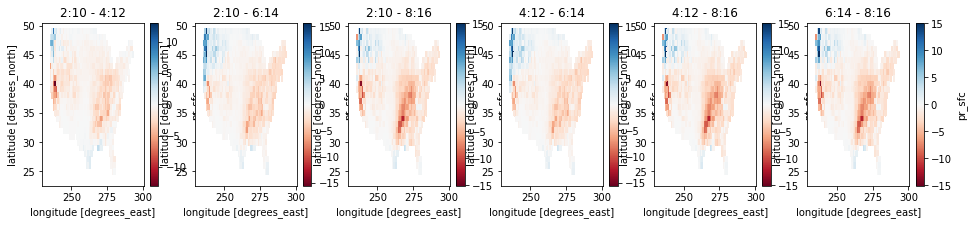

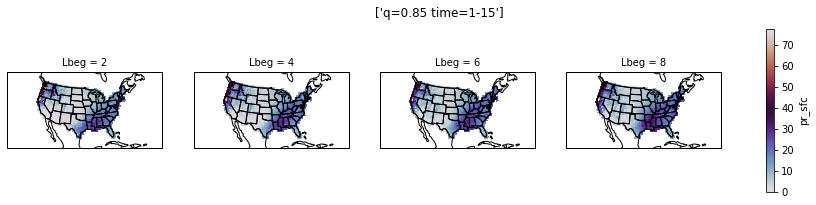

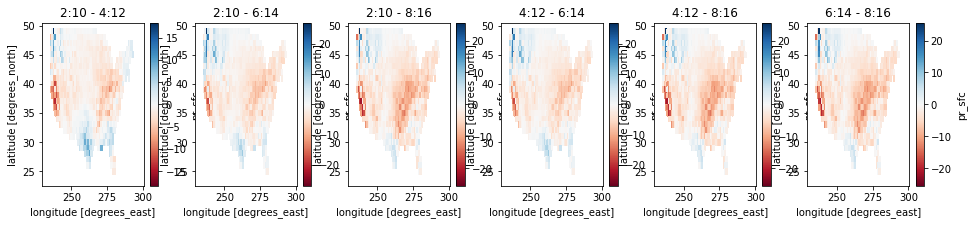

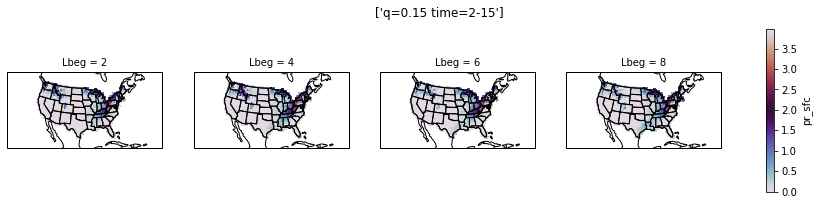

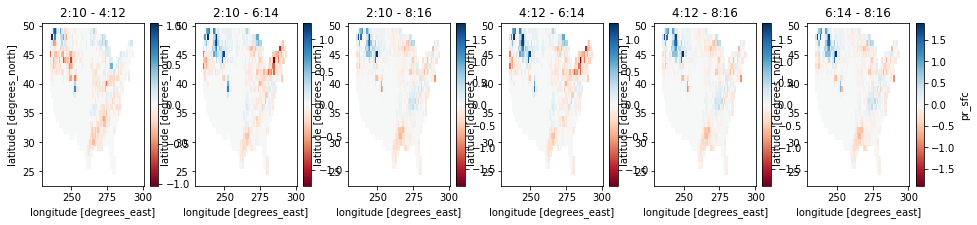

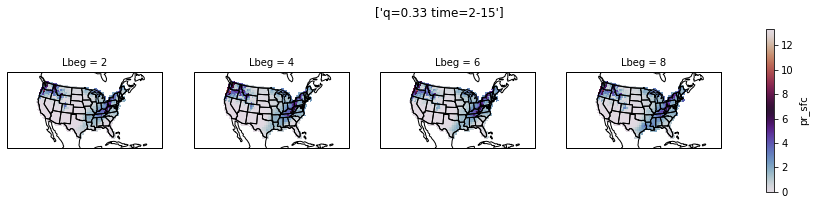

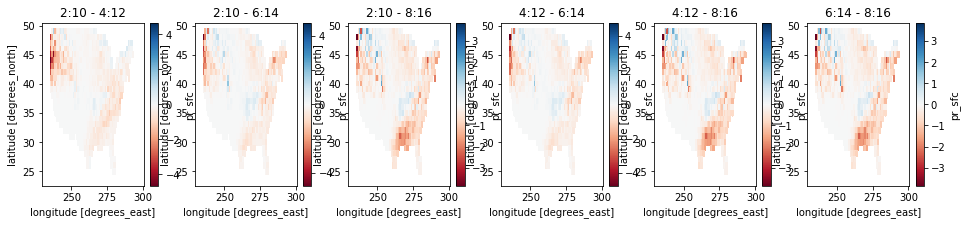

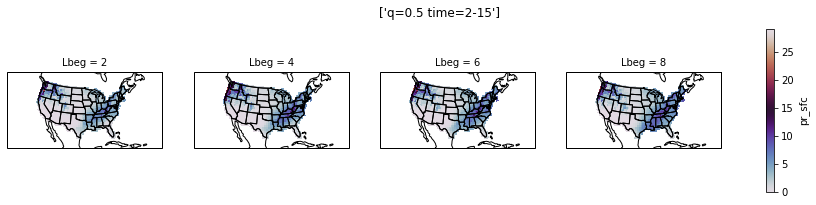

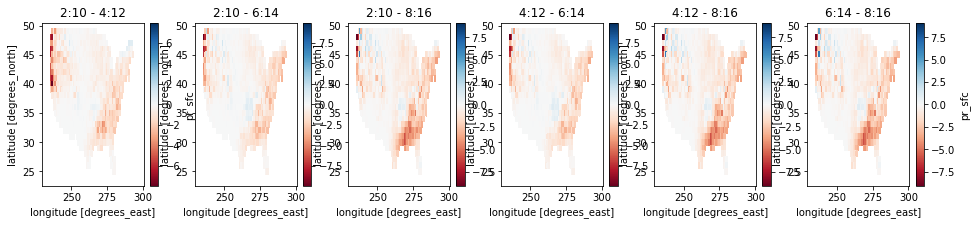

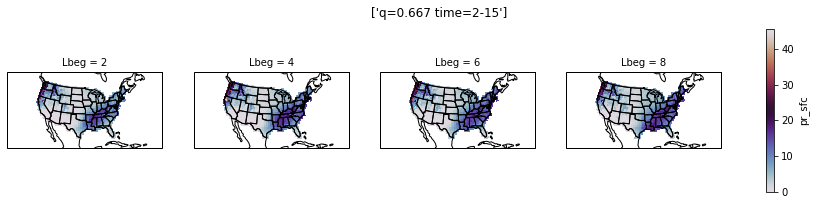

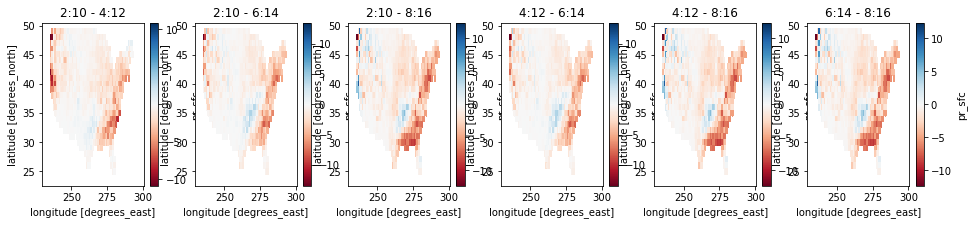

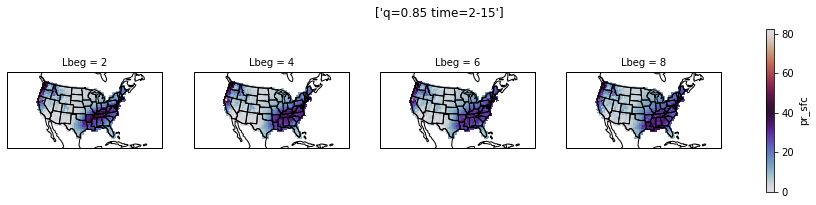

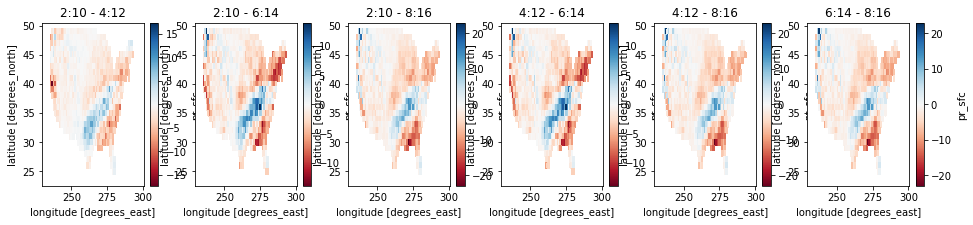

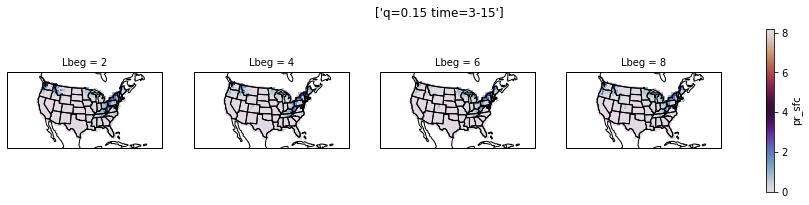

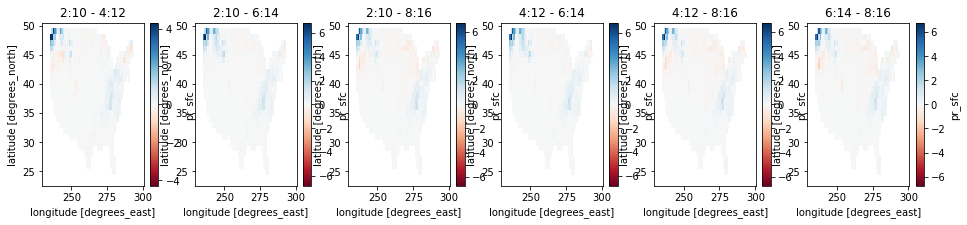

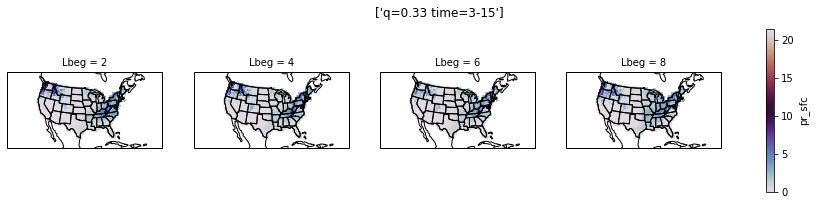

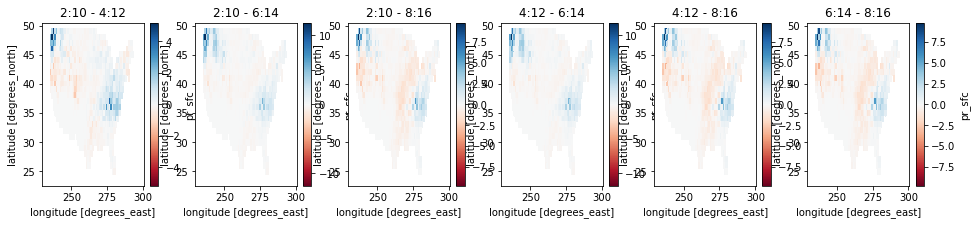

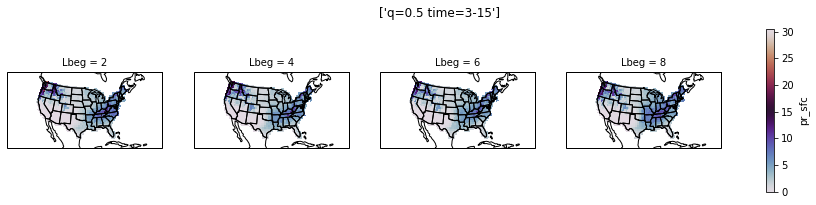

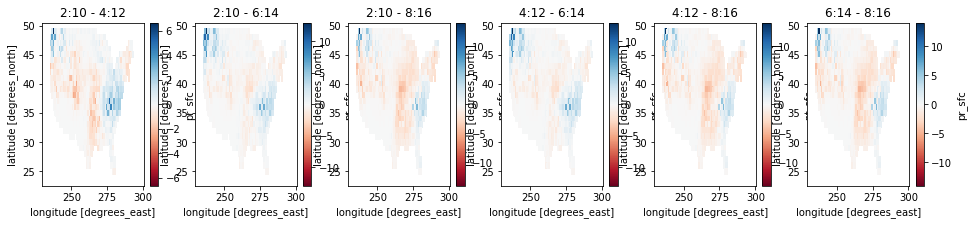

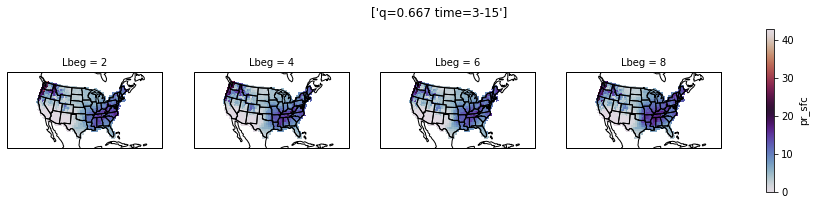

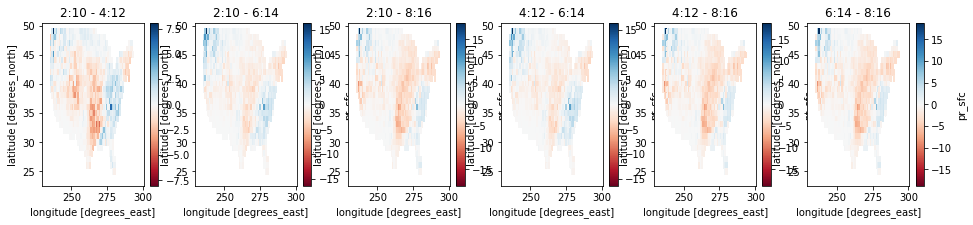

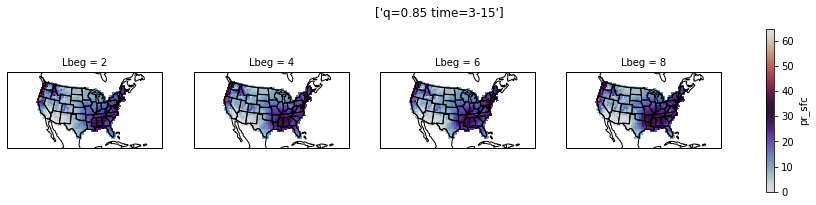

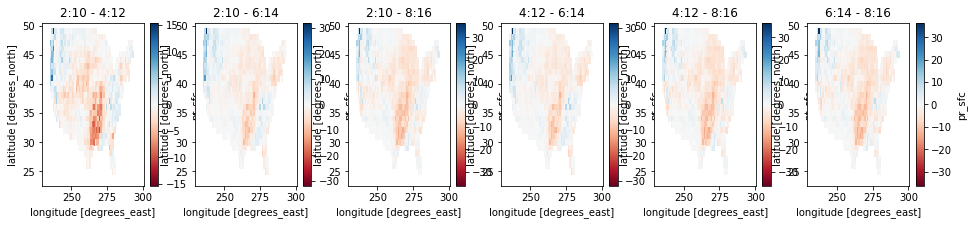

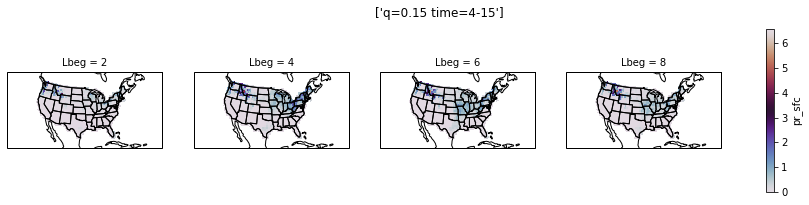

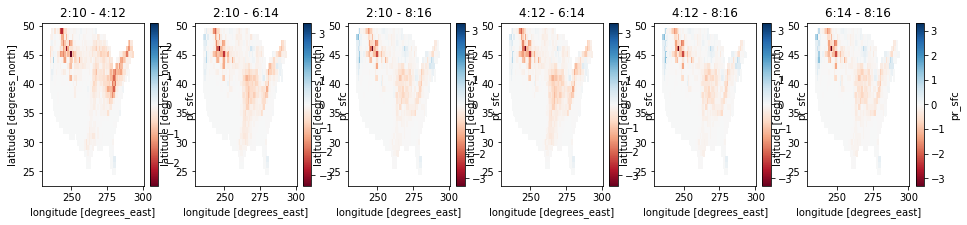

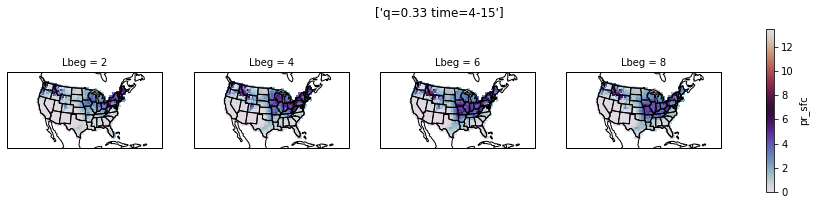

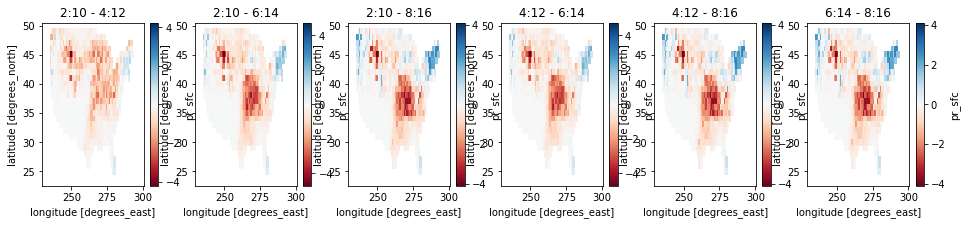

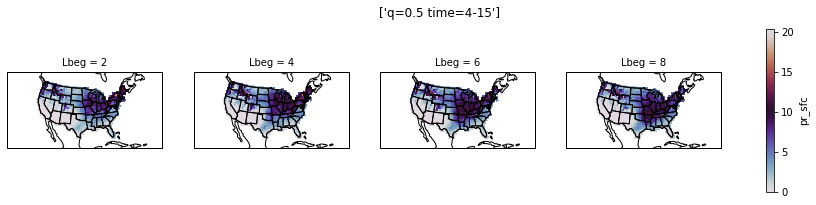

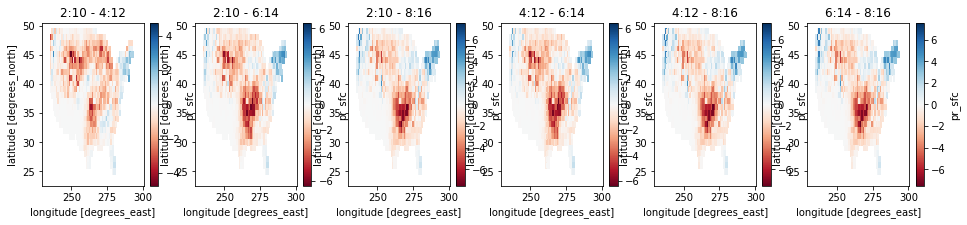

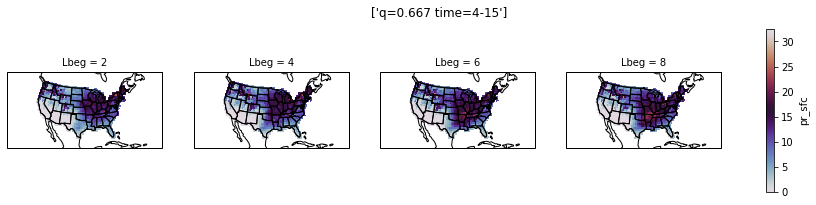

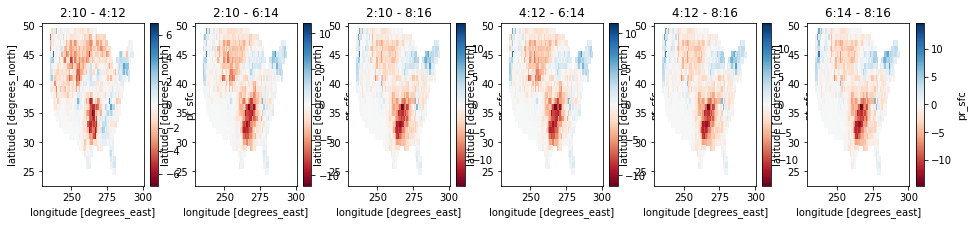

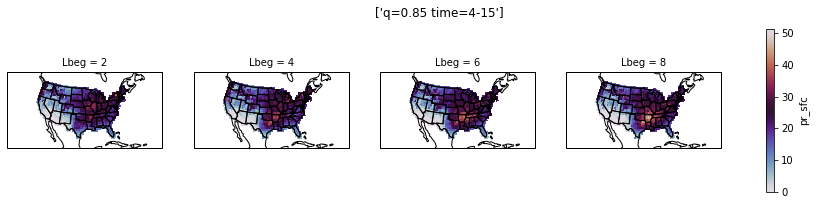

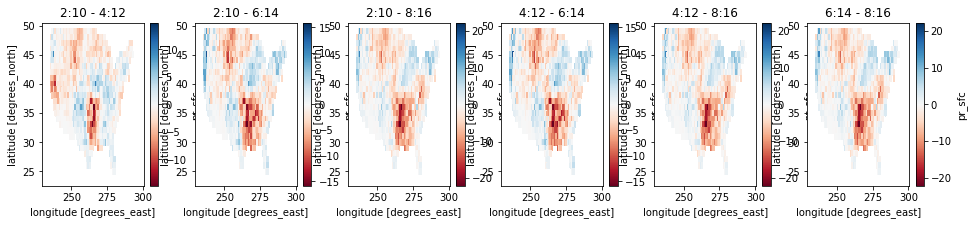

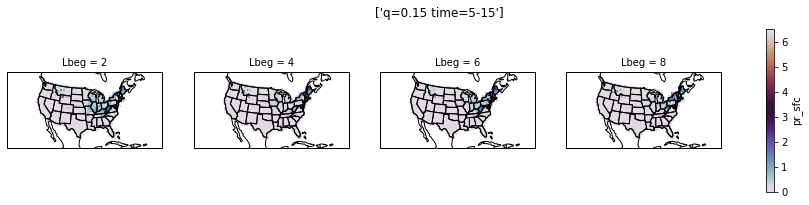

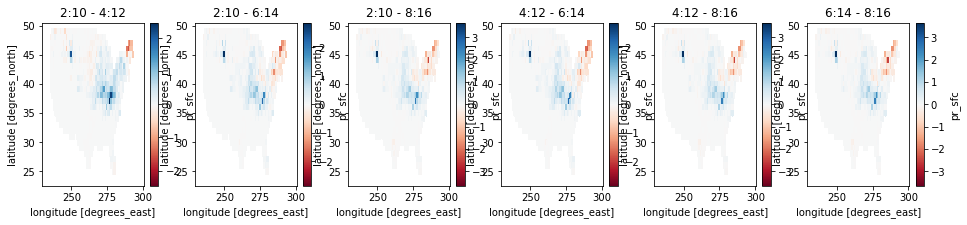

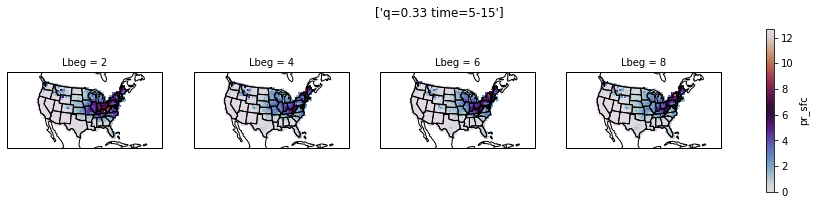

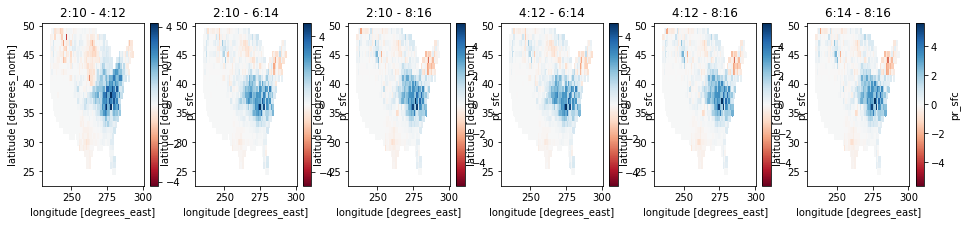

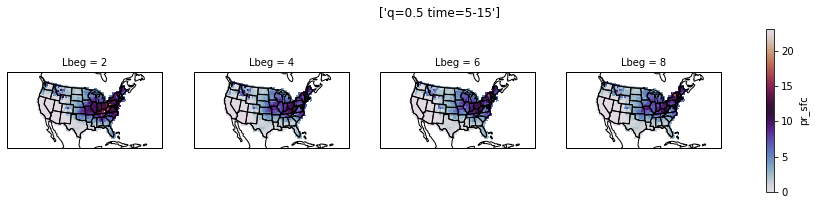

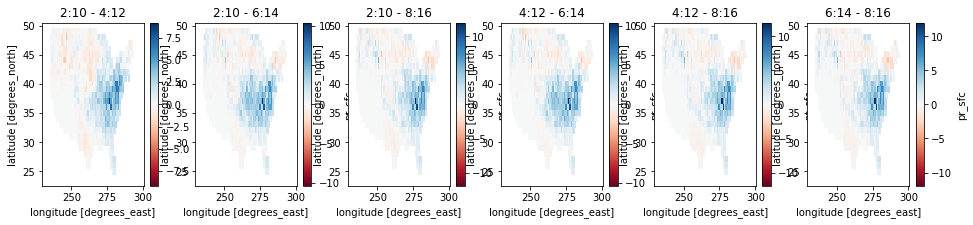

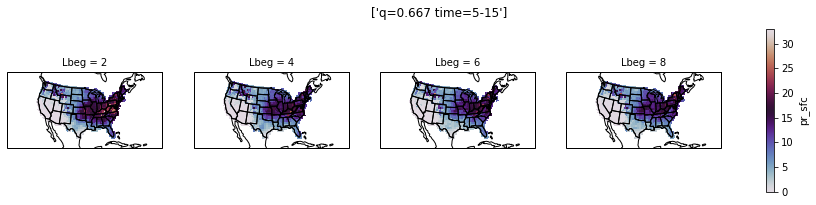

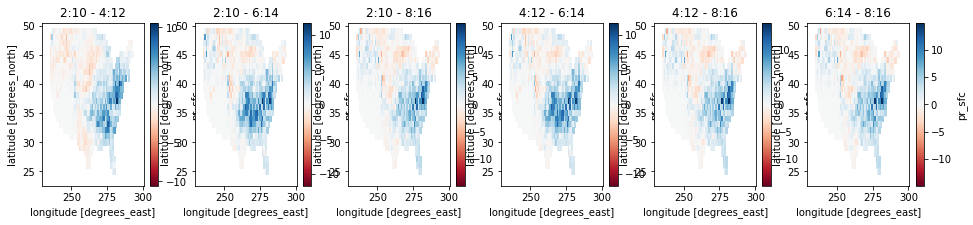

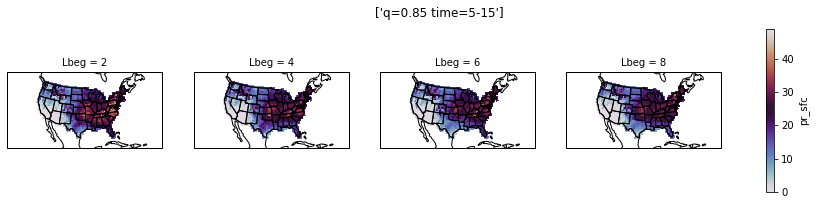

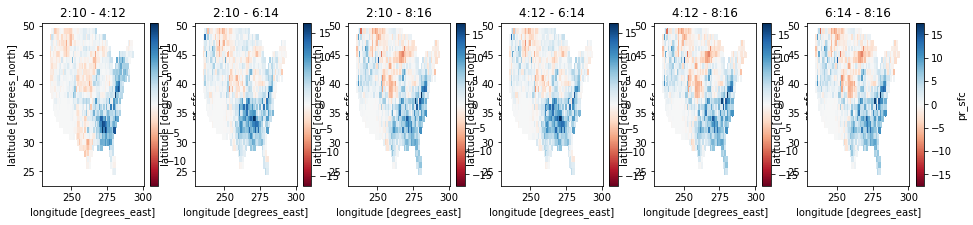

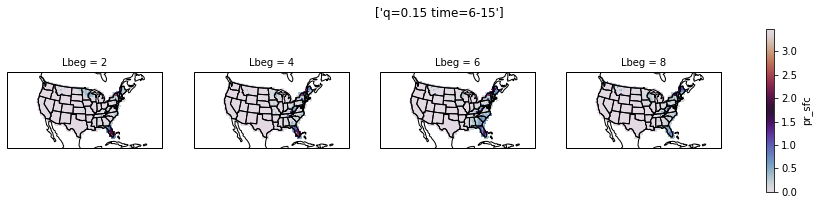

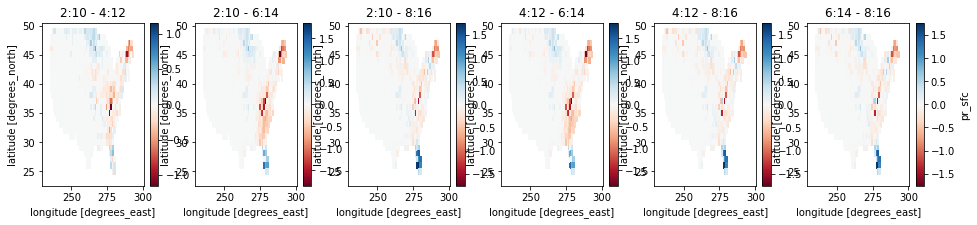

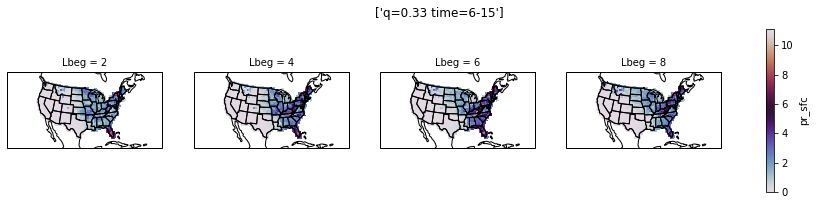

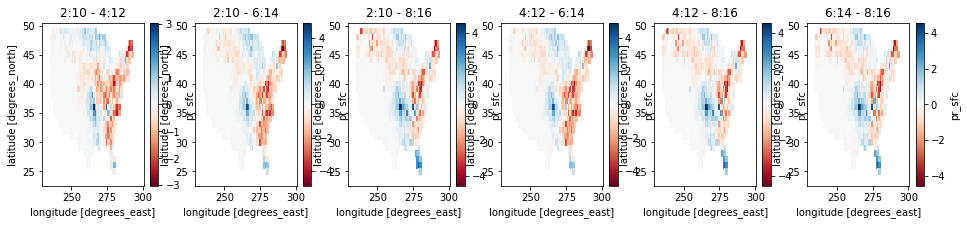

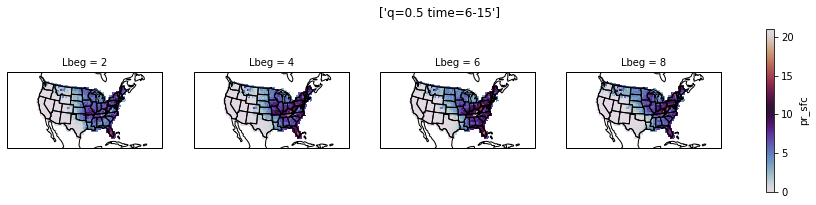

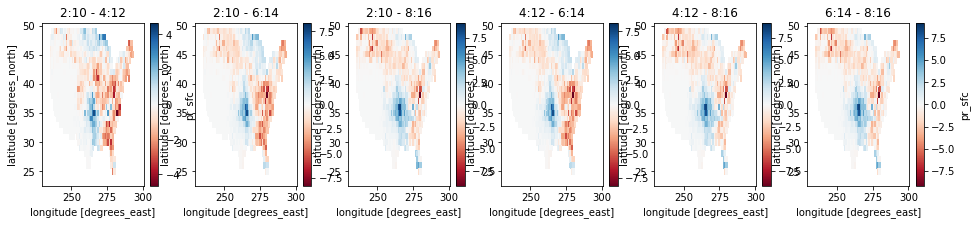

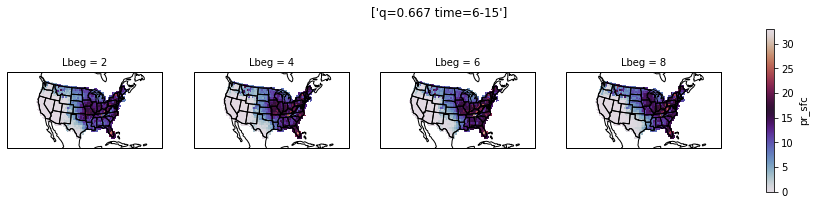

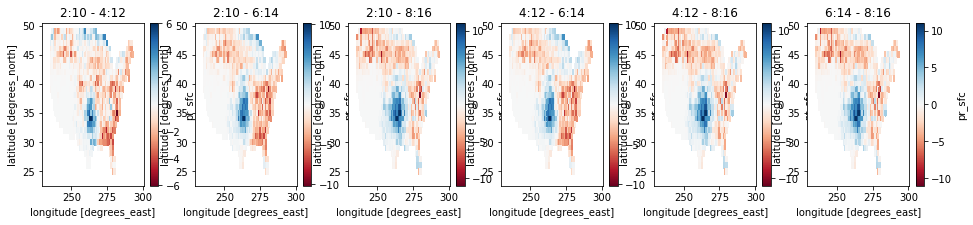

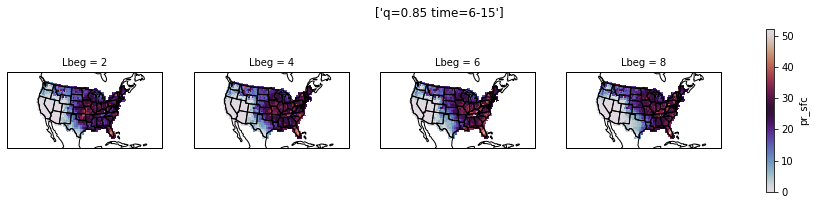

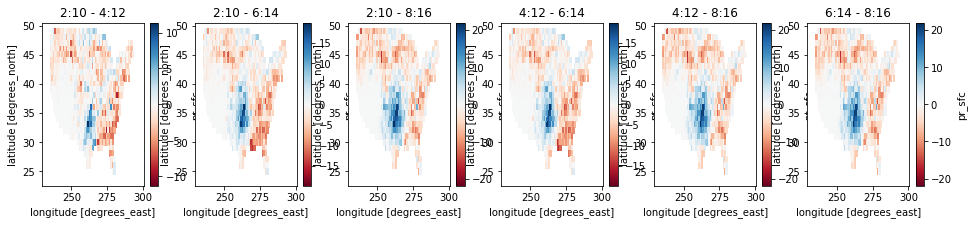

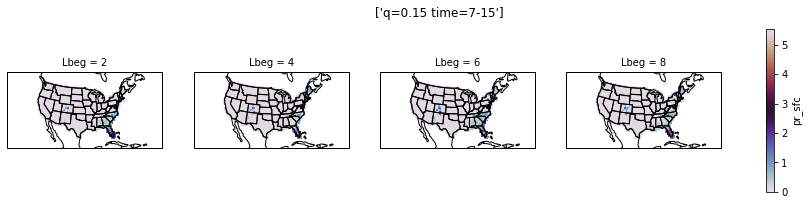

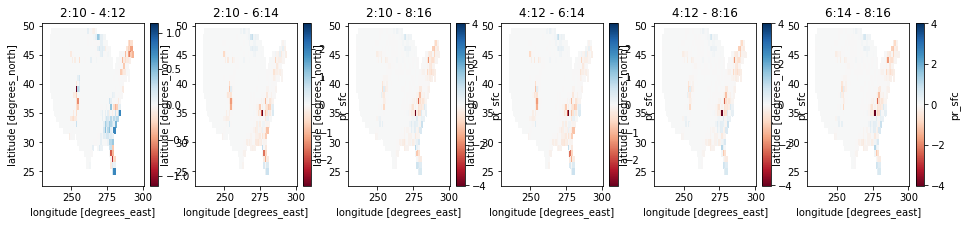

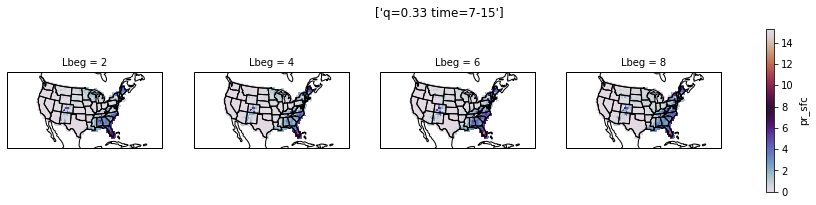

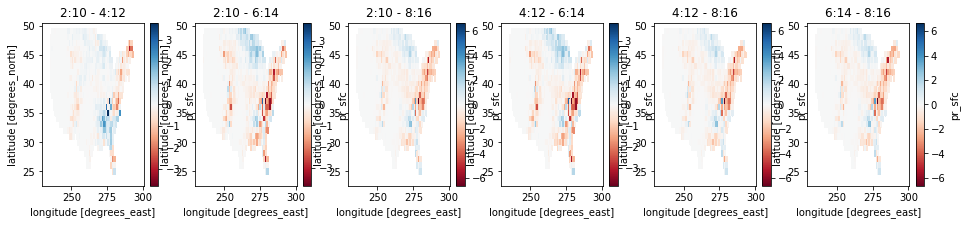

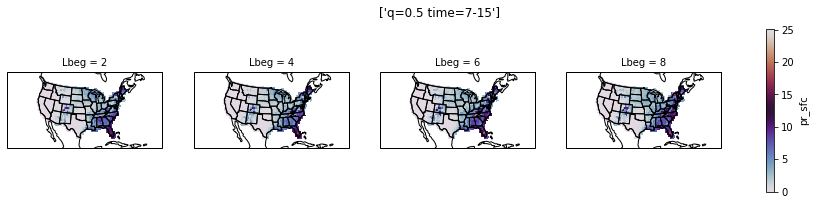

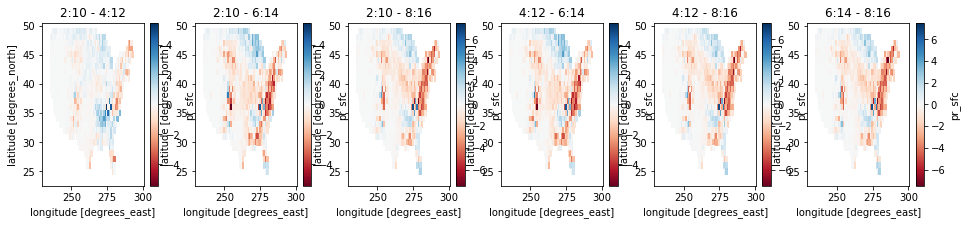

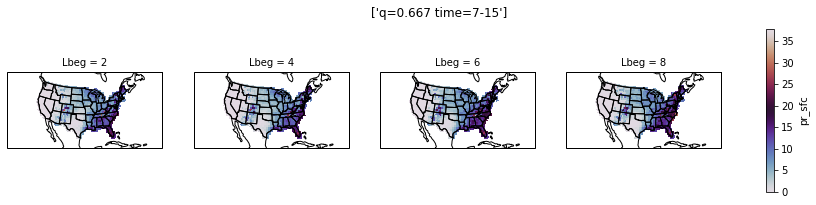

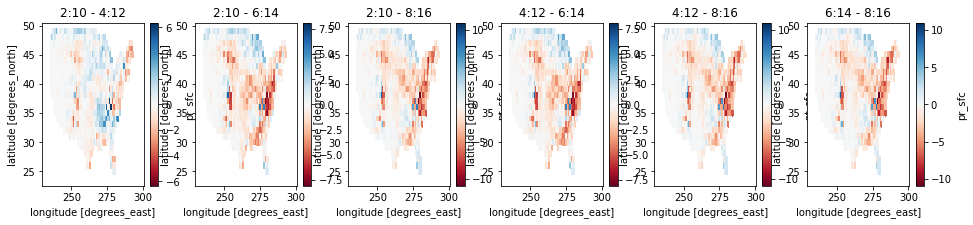

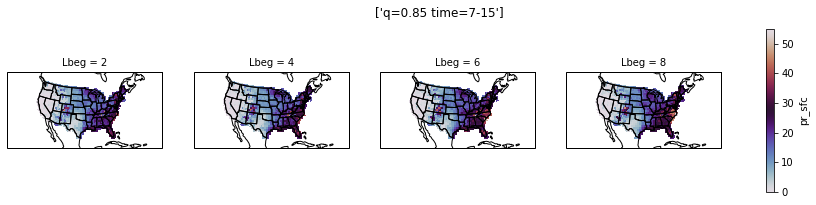

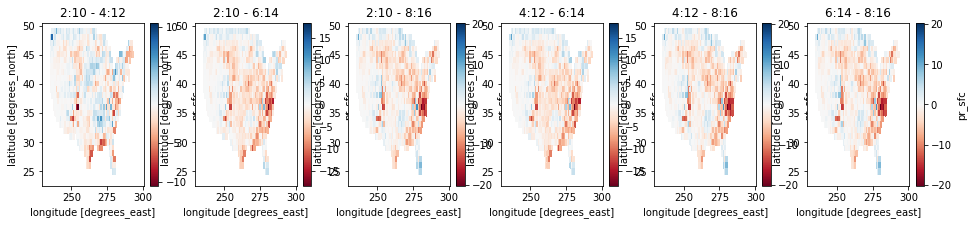

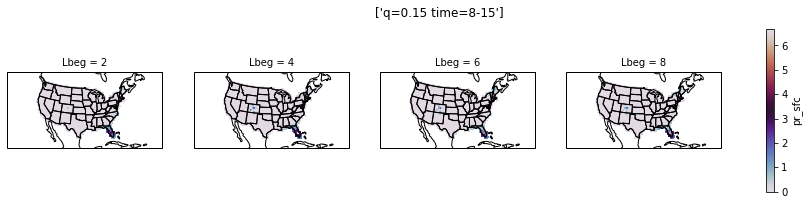

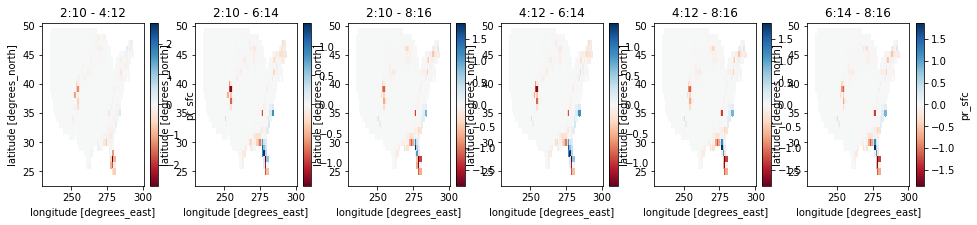

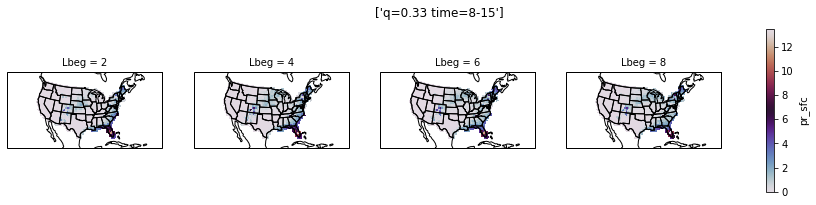

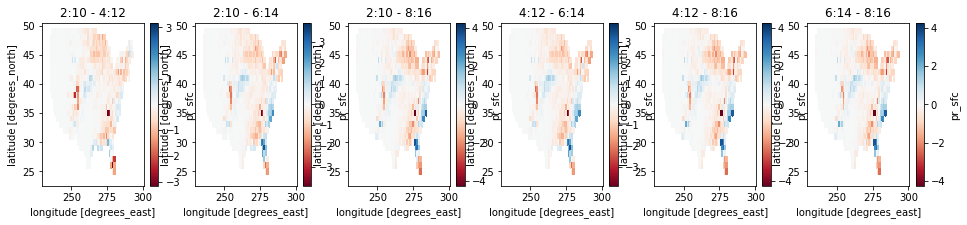

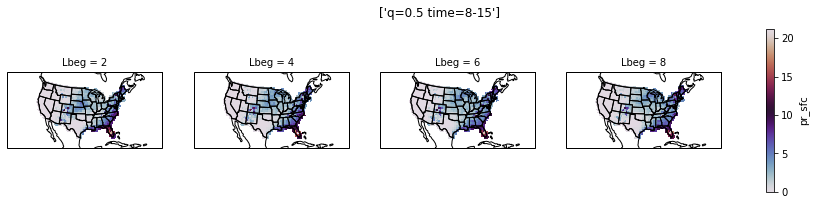

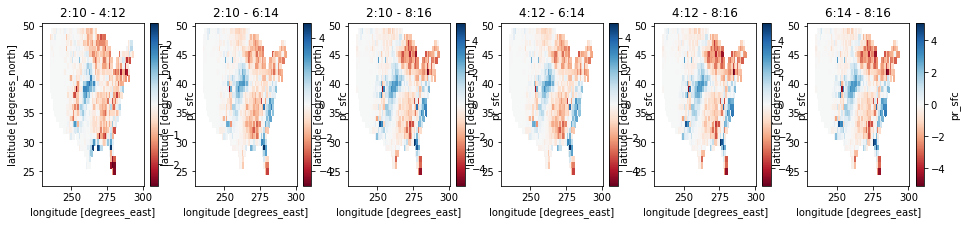

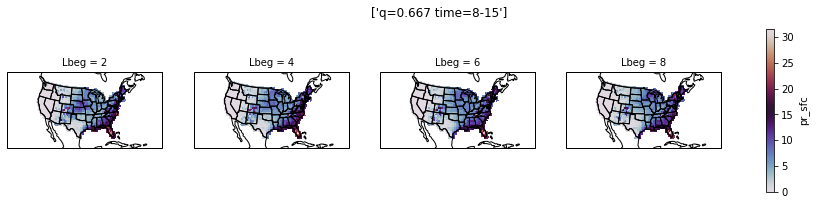

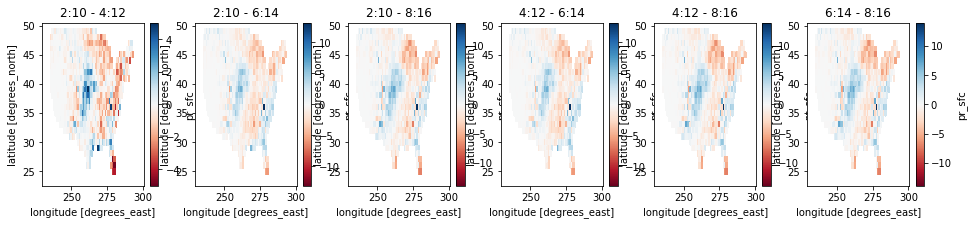

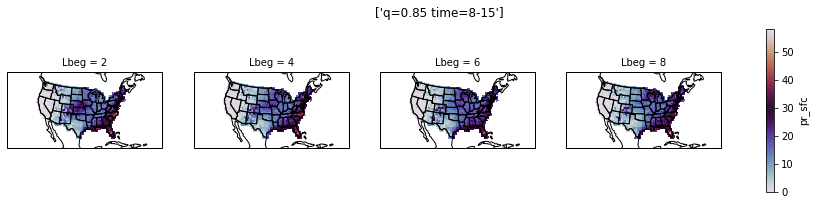

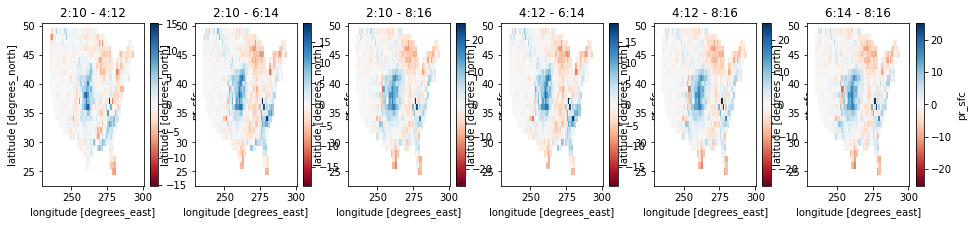

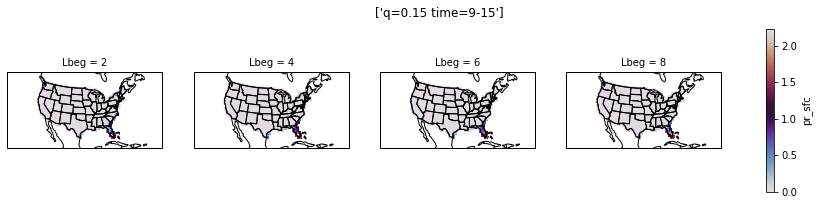

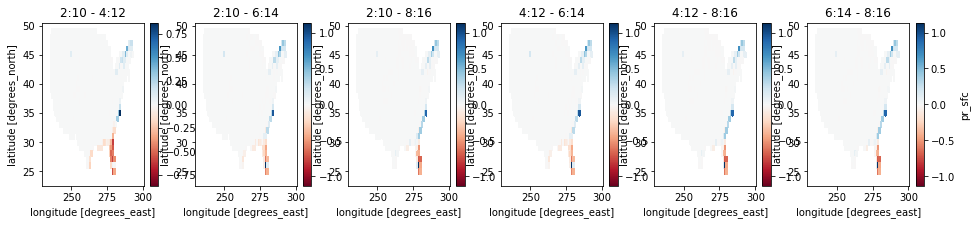

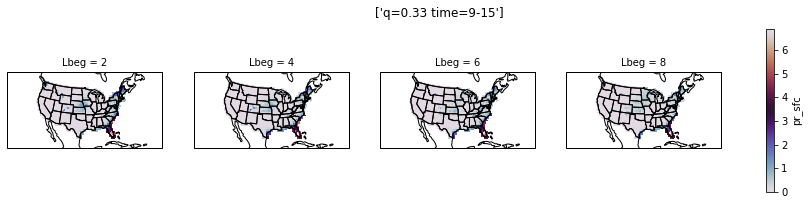

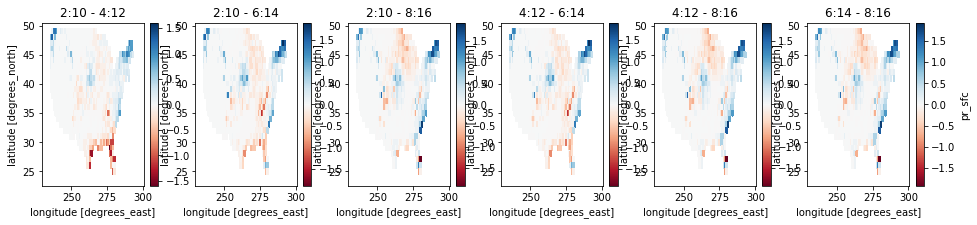

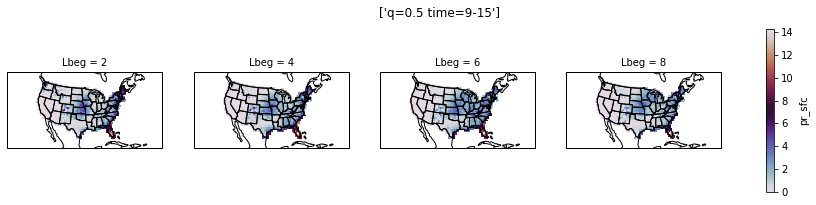

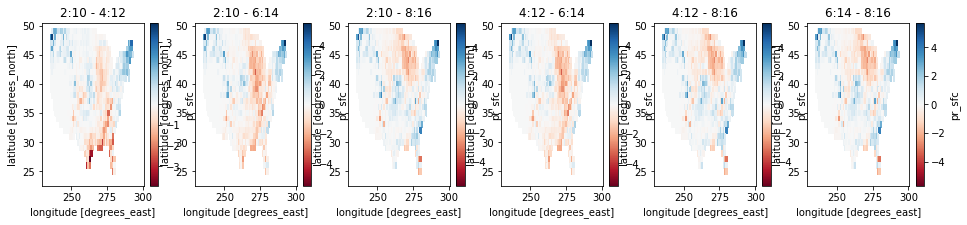

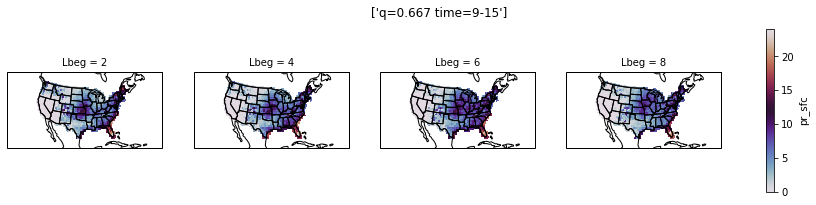

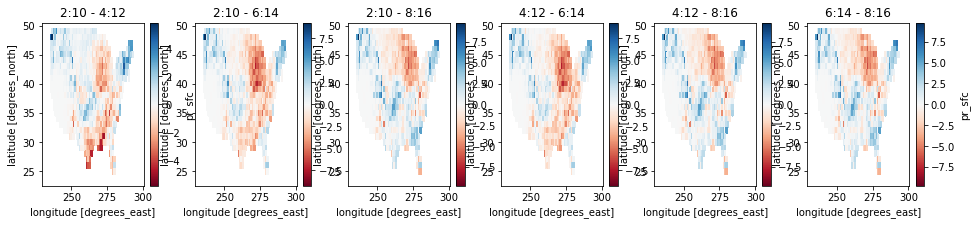

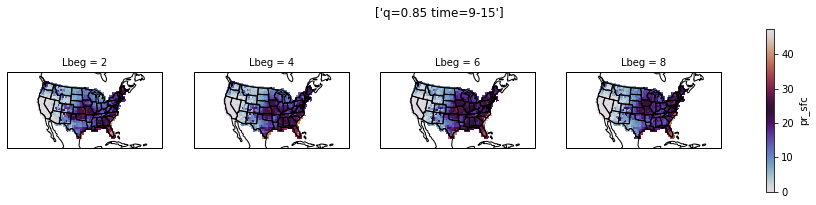

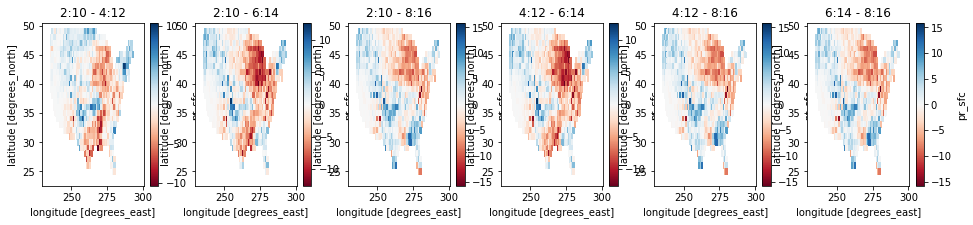

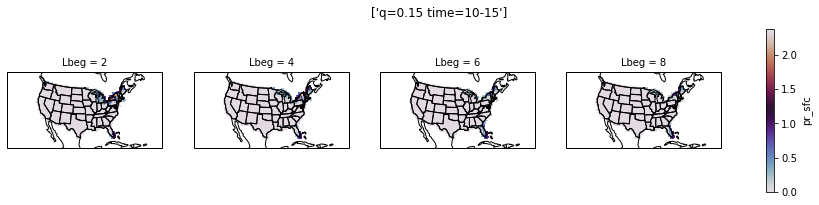

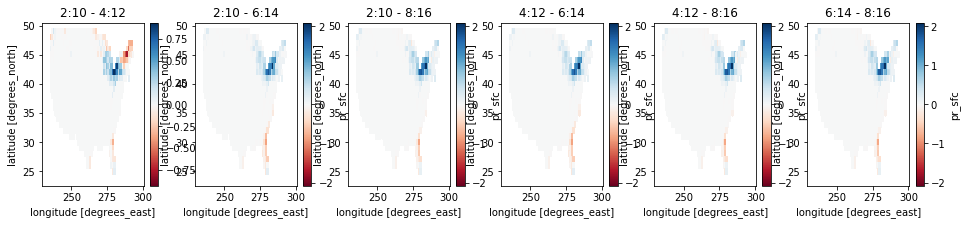

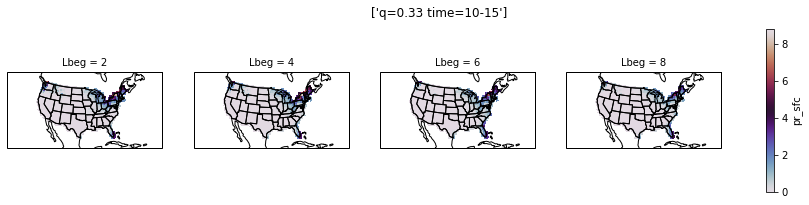

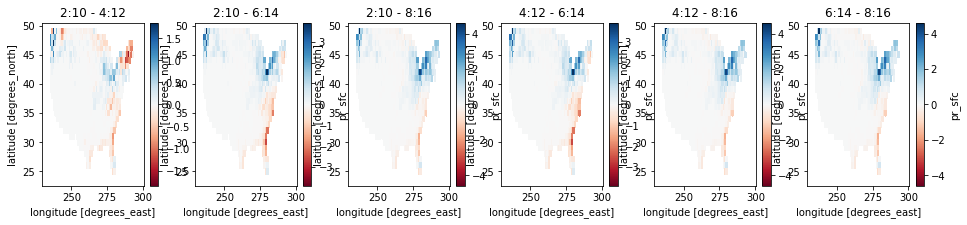

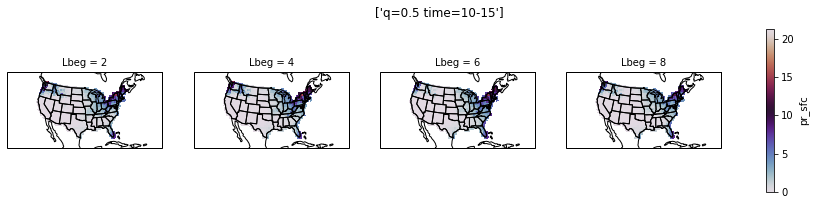

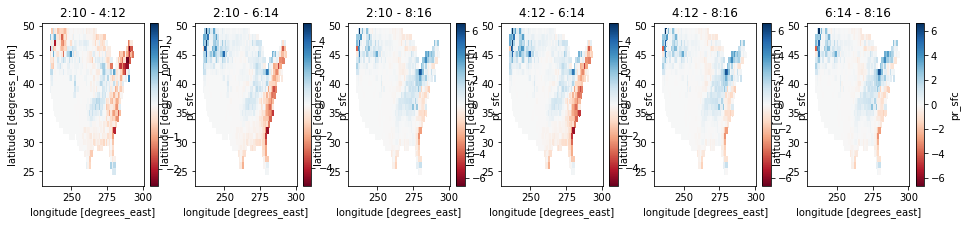

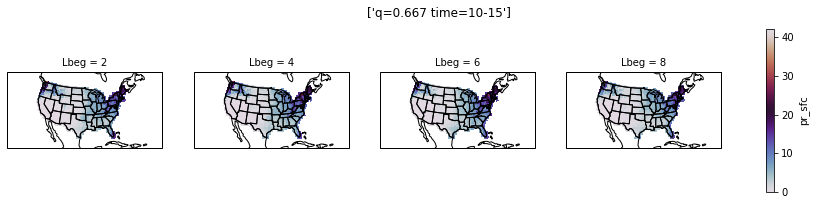

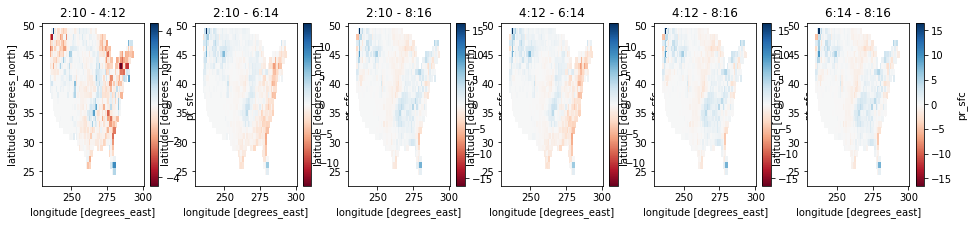

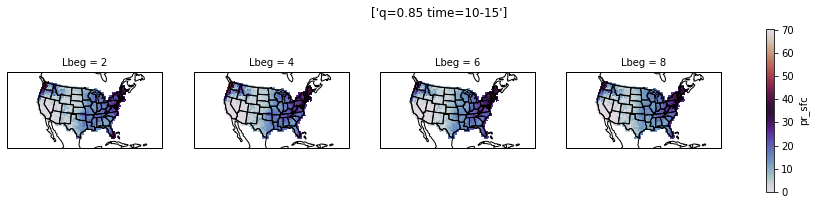

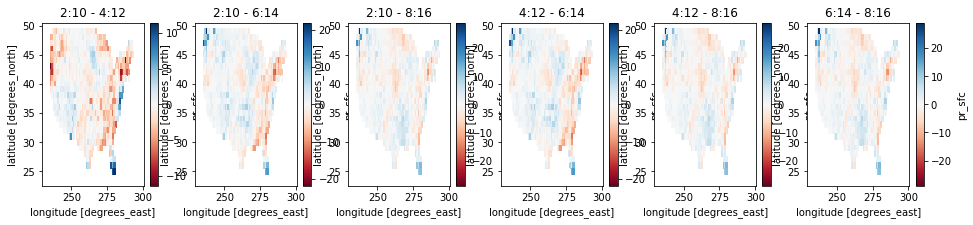

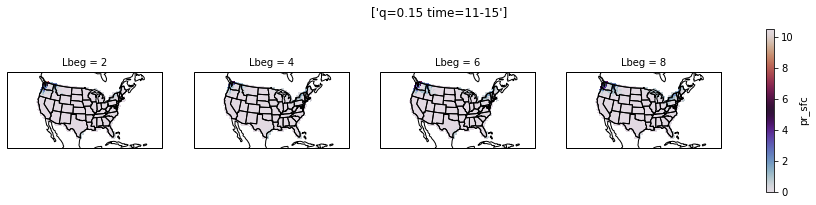

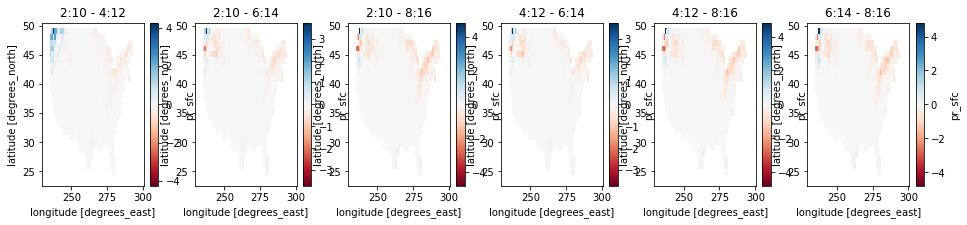

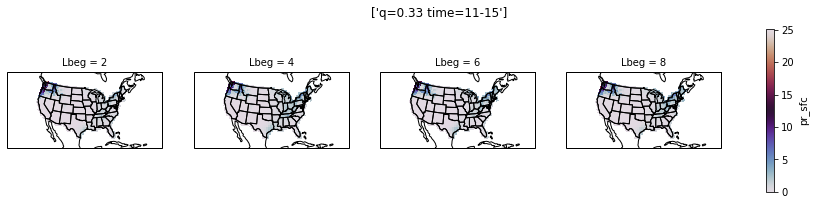

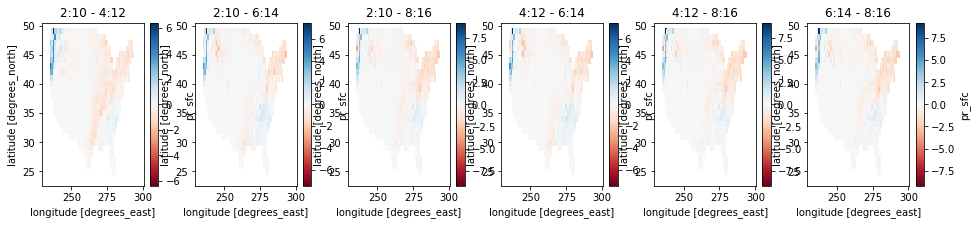

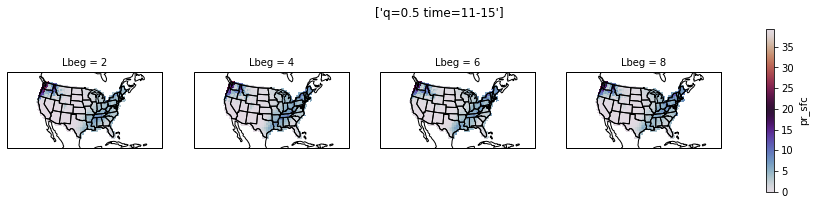

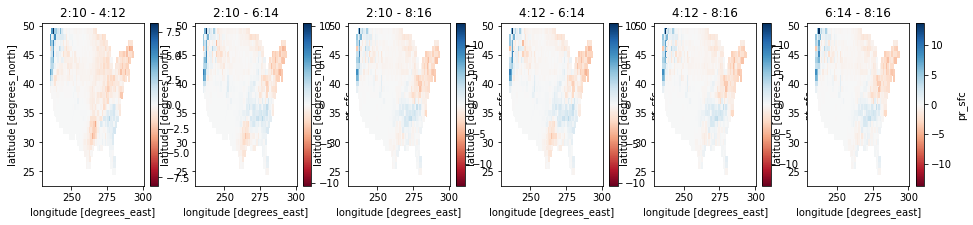

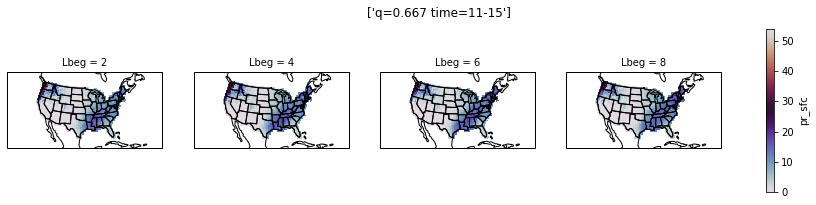

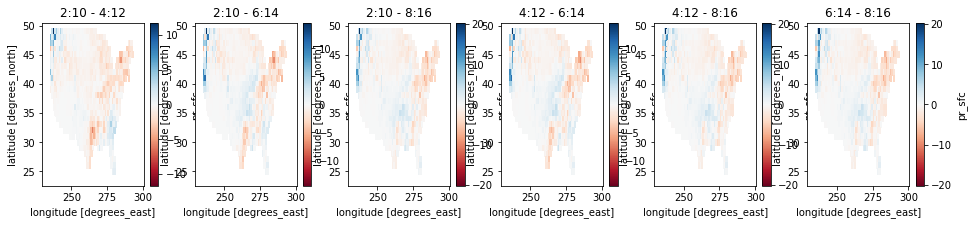

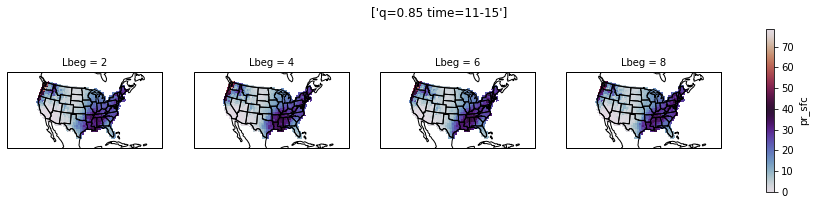

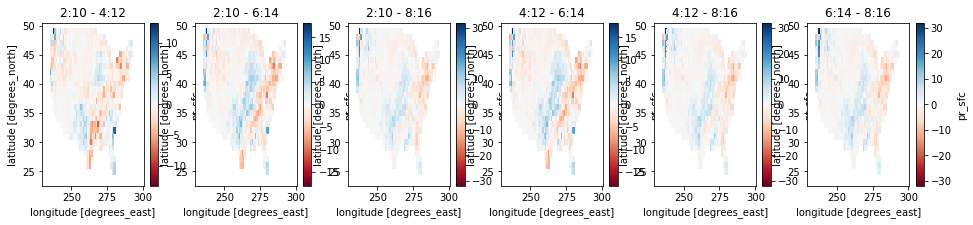

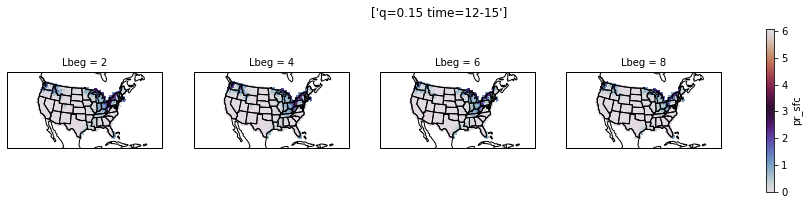

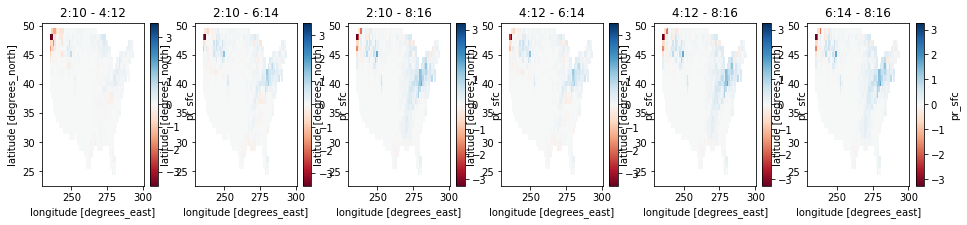

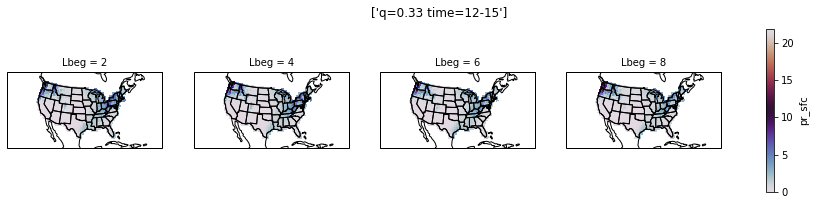

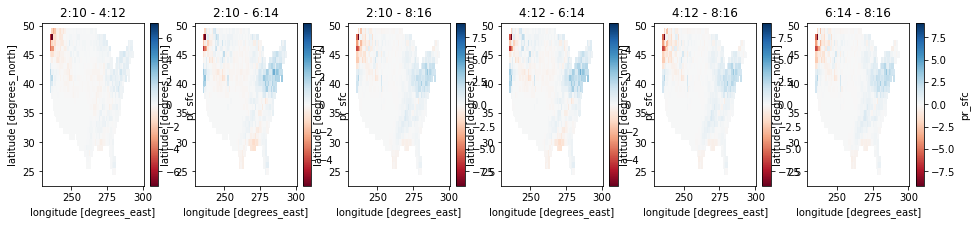

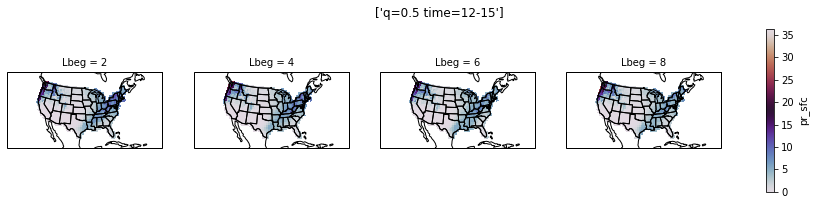

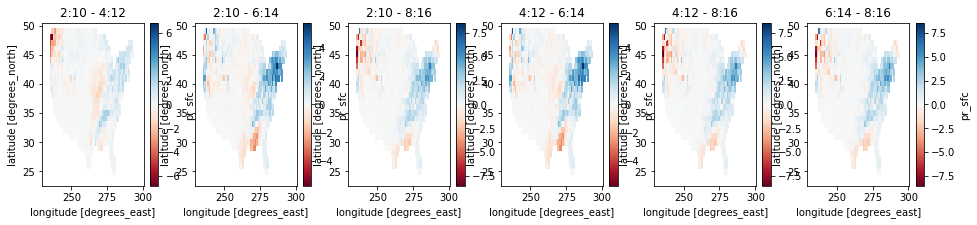

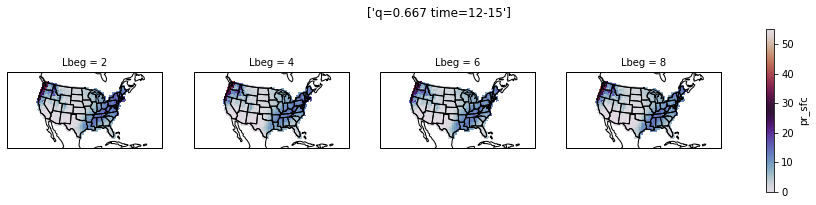

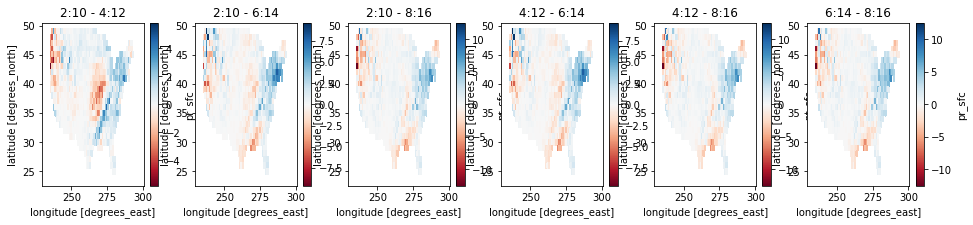

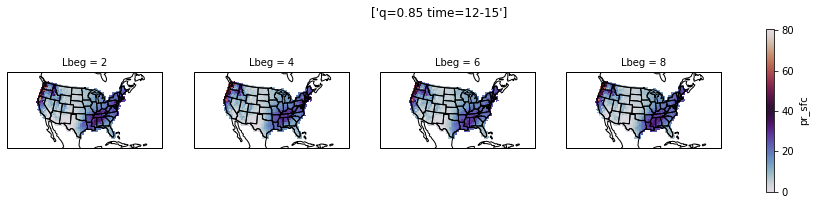

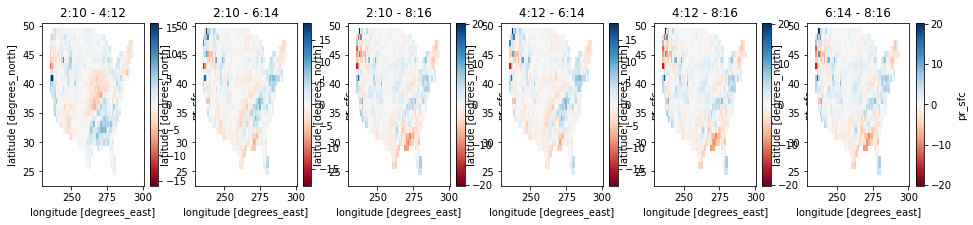

In [27]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

for iT in ds_clim_test_3d.target_clim:
    temp = ds_clim_test_3d.sel(target_clim=iT.values)
    for iq in temp.quant:
        temp1 = temp.sel(quant=iq.values)
        temp1 = xr.where(temp1<0,0,temp1)
#         print(temp1)
        outp = temp1.pr_sfc.where(ds_mask.the_geom>0).plot(transform=ccrs.PlateCarree(),
                          col='Lbeg', col_wrap=4,
                                 figsize=(16,3),
                         subplot_kws={'projection': map_proj},
                         cmap='twilight')
        plt.suptitle(['q='+np.str(iq.values)+' time='+np.str(iT.dt.month.values)+'-'+np.str(iT.dt.day.values)])
        plt.figure(figsize=(16,3))
        ax = plt.subplot(161,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[1]).where(ds_mask.the_geom>0).plot(ax = ax,
                                                   subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - 4:12')
        ax = plt.subplot(162,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[2]).where(ds_mask.the_geom>0).plot(ax = ax,
                                                   subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - 6:14')
        ax = plt.subplot(163,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[3]).where(ds_mask.the_geom>0).plot(ax = ax,
                                                   subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - 8:16')
        ax = plt.subplot(164,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[2]).where(ds_mask.the_geom>0).plot(ax = ax,
                                                   subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('4:12 - 6:14')
        ax = plt.subplot(165,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[3]).where(ds_mask.the_geom>0).plot(ax = ax,
                                                   subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('4:12 - 8:16')
        ax = plt.subplot(166,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[3]).where(ds_mask.the_geom>0).plot(ax = ax,
                                                   subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('6:14 - 8:16')
        
        
        for axi in outp.axes[:][0]:
            axi.coastlines()
            axi.add_feature(cfeature.BORDERS)
            axi.add_feature(cfeature.STATES)
            